Hello   

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pltly
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import tap 
import plotly.graph_objects as go

In [139]:
df = pd.read_csv(r"C:\Users\defrang\MGT_499\SOC perennials DATABASE.csv", skiprows=1, encoding='latin1')
print(df.head())


   ID  IDstudy  plotID country    region  temperature_Celsiul  \
0   1        1       1  Brazil  SaoPaulo                 21.0   
1   2        1       1  Brazil  SaoPaulo                 21.0   
2   3        1       1  Brazil  SaoPaulo                 21.0   
3   4        1       1  Brazil  SaoPaulo                 21.0   
4   5        1       2  Brazil  SaoPaulo                 21.0   

   precipitation_mm   climate  Latitud  Longitud  ... %clay_previous  \
0            1500.0  Tropical   -21.35   -47.066  ...           19.2   
1            1500.0  Tropical   -21.35   -47.066  ...           21.7   
2            1500.0  Tropical   -21.35   -47.066  ...           24.8   
3            1500.0  Tropical   -21.35   -47.066  ...           24.8   
4            1500.0  Tropical   -21.35   -47.066  ...           42.9   

  %silt_previous %sand_previous ph_previous SOC_g_kg_previous  \
0           10.4           70.5         NaN               NaN   
1            8.9           69.3         NaN   

In [140]:
#Check the data types 
df.dtypes

df.describe()

#List all column names
df.columns


Index(['ID', 'IDstudy', 'plotID', 'country', 'region', 'temperature_Celsiul',
       'precipitation_mm', 'climate', 'Latitud', 'Longitud', 'bedrock',
       'soil_type', 'USDA', 'TYPE_CHANGE', 'CROP_current', 'CROP_type',
       'cropAGE', 'current_land_use*', 'LUC_this_study', 'previous_land_use*',
       'years_since_luc', 'TEMPORAL_only_this study', 'timeTEMPORAL',
       'CHANGE_management', 'year_since_MANAGEMENT_CHANGE', 'soil_treatments',
       'tillageYESNO', 'tillage_type', 'fertilizerYESNO', 'fet_type',
       'rate_fertilizer_kh_ha', 'pesticides', 'org_amendYESNO',
       'org_amend_type', 'prev_man', 'SINGLE_DATA-MULTIPLE_SINGLEAMPLING',
       'DIF_DEPTH_current_point', 'CONTI_DEPTH', 'NUM_DEPTH', 'year_measure',
       'N_plots_current', 'N_sample_per_plot_current', 'N_measured_current',
       'soil_from_cm_current', 'soil_to_cm_current', 'depth_midpoint_current',
       'bulk_density_Mg_m3_current', '%clay_current', '%silt_current',
       '%sand_current', 'ph_current'

In [141]:
#Create a unique list of all land use change combinations (i.e. 'current_land_use* - 'previous_land_use*'

#Create a new dataframe that combines the strings in the 'LUC_this_study' and 'previous_land_use' columns into a new column called 'LUC type'"02_Data-Cleaning-Key-concepts (1).ipynb"

df['LUC type'] = df['previous_land_use*'] + ' -> ' + df['current_land_use*']

#Create a unique list of all land use change combinations (i.e. 'previous_land_use* - 'current_land_use*')
df['LUC type'].unique()

#Count the number of unique land use change combinations
df['LUC type'].nunique()

df['LUC type'].value_counts()




LUC type
grassland -> bioenergy             210
annual_crop -> bioenergy           191
annual_crop -> SRC                 179
natural_forest -> food             173
grassland -> food                   60
annual_crop -> food                 54
secondary_forest -> food            48
grassland -> SRC                    43
SRC -> annual_crop                  18
natural_forest -> bioenergy         17
natural_forest -> SRC               14
natural_forest -> bioproduct        12
annual_crop -> bioproduct           11
natural_forest -> agrofor           10
fallow -> SRC                        9
perennial_food -> bioenergy          8
secondary_forest -> bioproduct       8
fallow -> food                       8
grassland -> livestockfood           7
annual_crop -> livestockfood         6
natural_forest -> livestockfood      6
secondary_forest -> bioenergy        4
grassland -> bioproduct              4
SRC -> bioenergy                     3
secondary_forest -> SRC              2
fallow -> bioene

We found 26 different unique land use change types. Now, we need to have a systematic way of ranking these land use change types.

There are also some acronyms that we need to define: 

- SRC: short rotation coppice : planting of fast growing trees (usually willow or poplar, 2-8 year cycle) to be used for energy 

In [142]:
#Do of the land use change types have similar plant species in common?

#Show a dataframe just containing the LUC type and the current crop type
df[['LUC type', 'CROP_current']]

#How many unique instances of there of each crop type within each LUC type? 
df.groupby(['LUC type', 'CROP_current']).size()


LUC type                  CROP_current    
SRC -> annual_crop        Maize                9
                          Ryegrass             9
SRC -> bioenergy          Miscanthus           3
annual_crop -> SRC        Acacia               5
                          Black_locust         9
                                              ..
secondary_forest -> food  Cocoa                7
                          Coffee               5
                          Cupuacu              6
                          PalmOil              2
                          Peach_palm_fruit    12
Length: 84, dtype: int64

In [143]:
#Find the most common crop type for each LUC type
df.groupby('LUC type')['CROP_current'].agg(pd.Series.mode)

LUC type
SRC -> annual_crop                     [Maize, Ryegrass]
SRC -> bioenergy                              Miscanthus
annual_crop -> SRC                                Willow
annual_crop -> bioenergy                      Miscanthus
annual_crop -> bioproduct                          Ramie
annual_crop -> food                                  Tea
annual_crop -> livestockfood                  Brachiaria
fallow -> SRC                                     Acacia
fallow -> bioenergy                           Miscanthus
fallow -> food                                    Almond
grassland -> SRC                                  Willow
grassland -> bioenergy                         Sugarcane
grassland -> bioproduct                           Cotton
grassland -> food                                 Coffee
grassland -> livestockfood                      Atriplex
natural_forest -> SRC                         Eucalyptus
natural_forest -> agrofor                     Agroforest
natural_forest -> bioe

Ranked based on biodiversity retention and carbon sequestration potential ​

Criteria for Ranking: ​

Carbon Sequestration Potential (CSP): High CSP would result in a higher score.​

Biodiversity Impact (BI): High biodiversity retention would also score higher.​

Each land use change type will get an index value based on these two factors. To simplify:​

5: Both CSP and BI are high (minimal harm, or positive change).​

4: Moderate CSP and BI are maintained.​

3: Either CSP or BI is compromised significantly.​

2: Both CSP and BI are moderately reduced.​

1: Both CSP and BI are heavily compromised.​


In [255]:
# Define a function to categorize certain land use types as 'industrial monoculture'

#Make a new dataframe called df_luc that replaces 'annual_crop', 'bioenergy', 'food', 'bioproduct', and 'livestockfood' with 'annual crop'

df_luc = df.copy()

df_luc['current_land_use*'] = df_luc['current_land_use*'].apply(lambda x: 'annual crop' if x in ['annual_crop', 'bioenergy', 'food', 'bioproduct', 'livestockfood'] else x)

df_luc['previous_land_use*'] = df_luc['previous_land_use*'].apply(lambda x: 'annual crop' if x in ['annual_crop', 'bioenergy', 'food', 'bioproduct', 'livestockfood'] else x)

df_luc['LUC type'] = df_luc['previous_land_use*'] + ' -> ' + df_luc['current_land_use*']

df_luc['LUC type'].unique()

print(df_luc['LUC type'].value_counts())

def categorize_land_use(land_use):
        return land_use

# Create the dictionary with categorized land use types and their indices (CSP and BI combined)
land_use_indices = {
    categorize_land_use('SRC'): (2, 3),
    categorize_land_use('fallow'): (1, 2),
    categorize_land_use('secondary_forest'): (4, 4),
    categorize_land_use('grassland'): (3, 3),
    categorize_land_use('natural_forest'): (5, 5),
    categorize_land_use('agrofor'): (3, 4),
    categorize_land_use('perennial_food'): (3, 2),
    categorize_land_use('annual crop'): (1, 1),
    
}

land_use_indices




LUC type
grassland -> annual crop           266
annual crop -> annual crop         188
annual crop -> SRC                 143
natural_forest -> annual crop       67
grassland -> SRC                    43
secondary_forest -> annual crop     14
natural_forest -> SRC               12
perennial_food -> annual crop        8
fallow -> annual crop                8
fallow -> SRC                        8
SRC -> annual crop                   3
secondary_forest -> SRC              2
Name: count, dtype: int64


{'SRC': (2, 3),
 'fallow': (1, 2),
 'secondary_forest': (4, 4),
 'grassland': (3, 3),
 'natural_forest': (5, 5),
 'agrofor': (3, 4),
 'perennial_food': (3, 2),
 'annual crop': (1, 1)}

In [256]:
#Assign the previous and current land use indices to each row in the dataframe

#Drop any rows with missing values in the 'previous_land_use*' and 'current_land_use*' columns
df = df.dropna(subset=['previous_land_use*', 'current_land_use*'])

df_luc['previous_land_use_index'] = df_luc['previous_land_use*'].apply(lambda x: land_use_indices[categorize_land_use(x)])
df_luc['current_land_use_index'] = df_luc['current_land_use*'].apply(lambda x: land_use_indices[categorize_land_use(x)])

print(df.head())


   ID  IDstudy  plotID country   region   temperature_Celsiul  precipitation_mm  climate   Latitud  Longitud  bedrock    soil_type    USDA   TYPE_CHANGE CROP_current CROP_type  cropAGE current_land_use* LUC_this_study previous_land_use*  years_since_luc TEMPORAL_only_this study timeTEMPORAL CHANGE_management  year_since_MANAGEMENT_CHANGE soil_treatments tillageYESNO tillage_type fertilizerYESNO fet_type rate_fertilizer_kh_ha pesticides org_amendYESNO org_amend_type prev_man SINGLE_DATA-MULTIPLE_SINGLEAMPLING DIF_DEPTH_current_point CONTI_DEPTH  NUM_DEPTH  year_measure  N_plots_current  N_sample_per_plot_current  N_measured_current  soil_from_cm_current  soil_to_cm_current  depth_midpoint_current  bulk_density_Mg_m3_current  %clay_current  %silt_current  %sand_current  ph_current  SOC_g_kg_current sd_SOC_gkg_current  SOC_Mg_ha_current  sd_SOC_Mgha_current  N_plots_previous  N_sample_per_plot_previous  N_measured_current.1  soil_from_cm_previous  soil_to_cm_previous  \
0   1     1       

In [257]:
#Based on these indexes, rank the land use change from most to least sustainable, by calculating csp change and bi change

#Unpack the tuple in the 'previous_land_use_index' and 'current_land_use_index' columns into separate columns
df_luc['previous_CSP_index'] = df_luc['previous_land_use_index'].apply(lambda x: x[0])
df_luc['previous_BI_index'] = df_luc['previous_land_use_index'].apply(lambda x: x[1])
df_luc['current_CSP_index'] = df_luc['current_land_use_index'].apply(lambda x: x[0])
df_luc['current_BI_index'] = df_luc['current_land_use_index'].apply(lambda x: x[1])

# Calculate the csp change and bi change for each row
df_luc['csp_change'] = df_luc['current_CSP_index'] - df_luc['previous_CSP_index']  # Positive values indicate an increase in CSP
df_luc['bi_change'] = df_luc['current_BI_index'] - df_luc['previous_BI_index']  # Positive values indicate an increase in BI



In [258]:
# Define a function to rank land use change based on combined CSP and BI changes

def rank_land_use_change(csp_change, bi_change):
    """
    Ranks land use change based on the combined change in carbon sequestration potential (CSP) and biodiversity impact (BI).
    
    Parameters:
    - csp_change: Change in Carbon Sequestration Potential (scale of 1 to 5)
    - bi_change: Change in Biodiversity Impact (scale of 1 to 5)
    
    Returns:
    - rank: Index value from 1 to 5, where 5 is the most positive and 1 is the most harmful.
    """
    # Check for the combined CSP and BI
    if csp_change >= 1 and bi_change >= 1:
        return 5  # Both CSP and BI are high (minimal harm or positive change)
    elif csp_change >= 0 and bi_change >= 0:
        return 4  # Moderate CSP and BI are maintained
    elif csp_change >= -1 or bi_change >= -1:
        return 3  # Either CSP or BI is compromised significantly
    elif csp_change >= -2 and bi_change >= -2:
        return 2  # Both CSP and BI are moderately reduced
    else:
        return 1  # Both CSP and BI are heavily compromised

# Apply the function to rank the land use change
df_luc['land_use_change_rank'] = df_luc.apply(lambda x: rank_land_use_change(x['csp_change'], x['bi_change']), axis=1)

# Display the updated dataframe with the land use change rank
df_luc.head()


,ID,IDstudy,plotID,country,region,temperature_Celsiul,precipitation_mm,climate,Latitud,Longitud,bedrock,soil_type,USDA,TYPE_CHANGE,CROP_current,CROP_type,cropAGE,current_land_use*,LUC_this_study,previous_land_use*,years_since_luc,TEMPORAL_only_this study,timeTEMPORAL,CHANGE_management,year_since_MANAGEMENT_CHANGE,soil_treatments,tillageYESNO,tillage_type,fertilizerYESNO,fet_type,rate_fertilizer_kh_ha,pesticides,org_amendYESNO,org_amend_type,prev_man,SINGLE_DATA-MULTIPLE_SINGLEAMPLING,DIF_DEPTH_current_point,CONTI_DEPTH,NUM_DEPTH,year_measure,N_plots_current,N_sample_per_plot_current,N_measured_current,soil_from_cm_current,soil_to_cm_current,depth_midpoint_current,bulk_density_Mg_m3_current,%clay_current,%silt_current,%sand_current,ph_current,SOC_g_kg_current,sd_SOC_gkg_current,SOC_Mg_ha_current,sd_SOC_Mgha_current,N_plots_previous,N_sample_per_plot_previous,N_measured_current.1,soil_from_cm_previous,soil_to_cm_previous,depth_midpoint_previous,Bulkdensity_previous,%clay_previous,%silt_previous,%sand_previous,ph_previous,SOC_g_kg_previous,sd_SOC_gkg_previous,SOC_Mg_ha_previous,sd_SOC_Mgha_previous,yearPpub,Original_source,LUC type,previous_land_use_index,current_land_use_index,previous_CSP_index,previous_BI_index,current_CSP_index,current_BI_index,csp_change,bi_change,land_use_change_rank,log_SOC_Mg_ha_previous,log_SOC_Mg_ha_current,SOC_change,Temperature_K,SOC_change_category
0,1,1,1,Brazil,SaoPaulo,21.0,1500.0,Tropical,-21.35,-47.066,Sandstone,Ferralsols,Oxisols,LUC,Sugarcane,grass,3.0,annual crop,YES,perennial_food,3.0,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTI,YES,YES,4,2013.0,20.0,1.0,20,0.0,10.0,5.0,1.30,13.7,5.1,81.2,NaN,NaN,NaN,1.405438,NaN,20.0,1.0,20,0.0,10.0,5.0,1.36,19.2,10.4,70.5,NaN,NaN,NaN,1.363999,NaN,2017.0,"de Oliveira Bordonal, Ricardo, et al., 2017 Ch...",perennial_food -> annual crop,"(3, 2)","(1, 1)",3,2,1,1,-2,-1,3,1.363999,1.405438,0.165505,294.15,Increase
1,2,1,1,Brazil,SaoPaulo,21.0,1500.0,Tropical,-21.35,-47.066,Sandstone,Ferralsols,Oxisols,LUC,Sugarcane,grass,3.0,annual crop,YES,perennial_food,3.0,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTI,YES,YES,4,2013.0,20.0,1.0,20,10.0,20.0,15.0,1.34,14.8,1.1,84.2,NaN,NaN,NaN,1.282502,NaN,20.0,1.0,20,10.0,20.0,15.0,1.58,21.7,8.9,69.3,NaN,NaN,NaN,1.336997,NaN,2017.0,"de Oliveira Bordonal, Ricardo, et al., 2017 Ch...",perennial_food -> annual crop,"(3, 2)","(1, 1)",3,2,1,1,-2,-1,3,1.336997,1.282502,-0.201946,294.15,Decrease
2,3,1,1,Brazil,SaoPaulo,21.0,1500.0,Tropical,-21.35,-47.066,Sandstone,Ferralsols,Oxisols,LUC,Sugarcane,grass,3.0,annual crop,YES,perennial_food,3.0,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTI,YES,YES,4,2013.0,20.0,1.0,20,20.0,60.0,40.0,1.55,18.0,2.0,80.0,NaN,NaN,NaN,1.495873,NaN,20.0,1.0,20,20.0,60.0,40.0,1.41,24.8,8.7,66.5,NaN,NaN,NaN,1.615840,NaN,2017.0,"de Oliveira Bordonal, Ricardo, et al., 2017 Ch...",perennial_food -> annual crop,"(3, 2)","(1, 1)",3,2,1,1,-2,-1,3,1.615840,1.495873,-0.568882,294.15,Decrease
3,4,1,1,Brazil,SaoPaulo,21.0,1500.0,Tropical,-21.35,-47.066,Sandstone,Ferralsols,Oxisols,LUC,Sugarcane,grass,3.0,annual crop,YES,perennial_food,3.0,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTI,YES,YES,4,2013.0,20.0,1.0,20,60.0,100.0,80.0,1.46,18.8,3.5,77.7,NaN,NaN,NaN,1.529770,NaN,20.0,1.0,20,60.0,100.0,80.0,1.31,24.8,9.2,66.0,NaN,NaN,NaN,1.529012,NaN,2017.0,"de Oliveira Bordonal, Ricardo, et al., 2017 Ch...",perennial_food -> annual crop,"(3, 2)","(1, 1)",3,2,1,1,-2,-1,3,1.529012,1.529770,0.003498,294.15,Increase
4,5,1,2,Brazil,SaoPaulo,21.0,1500.0,Tropical,-21.35,-47.066,Sandstone,Luvisol,Ultisol,LUC,Sugarcane,grass,4.0,annual crop,YES,perennial_food,4.0,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTI,YES,YES,4,2013.0,20.0,1.0,20,0.0,10.0,5.0,1.20,38.1,10.9,51.0,NaN,NaN,NaN,1.350199,NaN,20.0,1.0,20,0.0,10.0,5.0,1.27,42.9,11.4,45.7,NaN,NaN,NaN,1.347956,NaN,2017.0,"de Oliveira Bordonal, Ricardo, et al., 2017 Ch...",perennial_food -> annual crop,"(3, 2)","(1, 1)",

In [259]:
#Print the unique luc types and in order of rank
#first, replace 'bioenergy', 'annual_crop', 'food', 'bioproduct', 'livestockfood' with 'annual crop'
df_luc.groupby('LUC type')['land_use_change_rank'].unique().sort_values(ascending=False)



LUC type
annual crop -> SRC                 [5]
fallow -> SRC                      [5]
annual crop -> annual crop         [4]
SRC -> annual crop                 [3]
fallow -> annual crop              [3]
grassland -> SRC                   [3]
perennial_food -> annual crop      [3]
secondary_forest -> SRC            [3]
grassland -> annual crop           [2]
natural_forest -> SRC              [1]
natural_forest -> annual crop      [1]
secondary_forest -> annual crop    [1]
Name: land_use_change_rank, dtype: object

There is a potential to get more nuanced with this by accounting for crop type and fertilizer

In [278]:
#In the land use changes from annual crop to annual crop, report the crop type change 

#Filter the dataframe to include only land use changes from 'annual crop' to 'annual crop'

df_annual_crop = df_luc[(df_luc['previous_land_use*'] == 'annual_crop') & (df_luc['current_land_use*'] == 'annual_crop')]

#Make a column called crop change 
df_annual_crop['crop_change'] = df_annual_crop['CROP_previous'] + ' -> ' + df_annual_crop['CROP_current']

#Print the unique crop changes
df_annual_crop['crop_change'].unique()



KeyError: 'CROP_previous'

Text(0.03, 0.5, 'Skewness: 0.09')

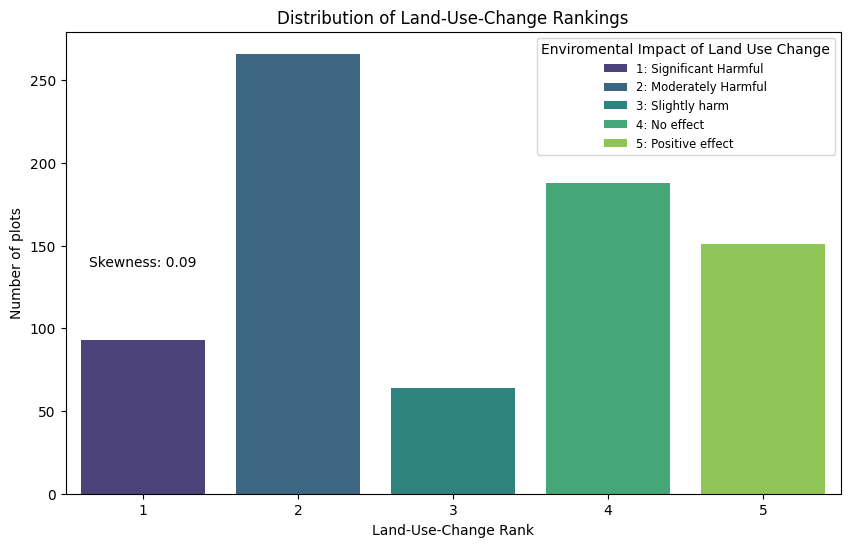

In [306]:

# Plot the distribution of land use change ranks
plt.figure(figsize=(10, 6))
sns.countplot(data=df_luc, x='land_use_change_rank', palette='viridis')
plt.title('Distribution of Land-Use-Change Rankings')
plt.xlabel('Land-Use-Change Rank')
plt.ylabel('Number of plots')
plt.legend(title='Enviromental Impact of Land Use Change', 
           labels=['1: Significant Harmful', '2: Moderately Harmful', '3: Slightly harm', '4: No effect', '5: Positive effect'], 
           loc='upper right', fontsize='small')

#Add the skewness coefficient to the plot
plt.text(0.03, 0.5, f'Skewness: {df_luc["land_use_change_rank"].skew():.2f}', 
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)


In [302]:
#Make a choropleth of land use change rank by country

#Group the data by country and calculate the average land use change rank to two decimal places

country_rank = df_luc.groupby('country')['land_use_change_rank'].mean().round(2).reset_index()

fig = px.choropleth(country_rank, locations='country', locationmode='country names', color='land_use_change_rank', 
                    color_continuous_scale='spectral', 
                    range_color = [1, 5],
        
                    title='Average Land-Use-Change Rank by Country')
fig.update_layout(coloraxis_colorbar=dict(title='Land Use Change Rank'))
fig.show()

#Save the figure as an HTML file and save it to the current working directory
fig.write_html('land_use_change_rank_by_country.html')

In [204]:
from IPython.display import display

#Make a table with all of the land use change types and their corresponding ranks
df_ranked = df[['LUC type', 'land_use_change_rank']].drop_duplicates().sort_values(by='land_use_change_rank', ascending=False)
display(df_ranked)


fig = go.Figure(data=[go.Table(header=dict(values=['LUC type', 'Land Use Change Rank']), 
                    cells=dict(values=[df_ranked['LUC type'], df_ranked['land_use_change_rank']]))
                        ])

fig.show()

,LUC type,land_use_change_rank
62,annual_crop -> SRC,5
8,annual_crop -> bioenergy,4
328,annual_crop -> bioproduct,4
221,annual_crop -> livestockfood,4
169,annual_crop -> food,4
1516,fallow -> SRC,4
981,SRC -> bioenergy,3
0,perennial_food -> bioenergy,3
1358,secondary_forest -> SRC,3
549,fallow -> food,3


   ID  IDstudy  plotID country   region   temperature_Celsiul  precipitation_mm  climate   Latitud  Longitud  bedrock    soil_type    USDA   TYPE_CHANGE CROP_current CROP_type  cropAGE current_land_use* LUC_this_study previous_land_use*  years_since_luc TEMPORAL_only_this study timeTEMPORAL CHANGE_management  year_since_MANAGEMENT_CHANGE soil_treatments tillageYESNO tillage_type fertilizerYESNO fet_type rate_fertilizer_kh_ha pesticides org_amendYESNO org_amend_type prev_man SINGLE_DATA-MULTIPLE_SINGLEAMPLING DIF_DEPTH_current_point CONTI_DEPTH  NUM_DEPTH  year_measure  N_plots_current  N_sample_per_plot_current  N_measured_current  soil_from_cm_current  soil_to_cm_current  depth_midpoint_current  bulk_density_Mg_m3_current  %clay_current  %silt_current  %sand_current  ph_current  SOC_g_kg_current sd_SOC_gkg_current  SOC_Mg_ha_current  sd_SOC_Mgha_current  N_plots_previous  N_sample_per_plot_previous  N_measured_current.1  soil_from_cm_previous  soil_to_cm_previous  \
0   1     1       

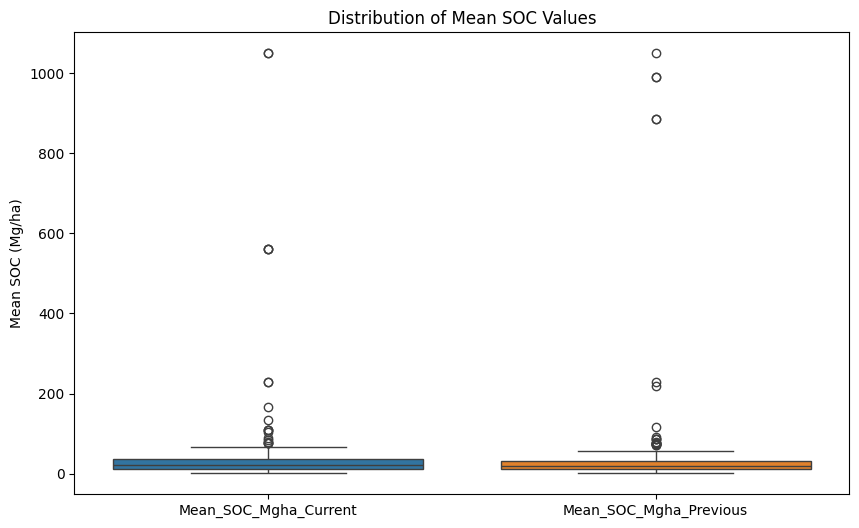

     IDstudy  plotID    country                     region                   Mean_SOC_Mgha_Current  Mean_SOC_Mgha_Previous   Delta_SOC
0        1        1         Brazil                                 SaoPaulo         16.620000               16.480000         0.140000
1        1        2         Brazil                                 SaoPaulo         15.470000               17.270000        -1.800000
2        1        3         Brazil                                 SaoPaulo         15.280000               14.460000         0.820000
3        1        4         Brazil                                 SaoPaulo          8.510000               15.145000        -6.635000
4        2        5         Canada                              Meadow_Lake               NaN                     NaN              NaN
5        2        6         Canada                              Meadow_Lake               NaN                     NaN              NaN
6        3        7            USA                     

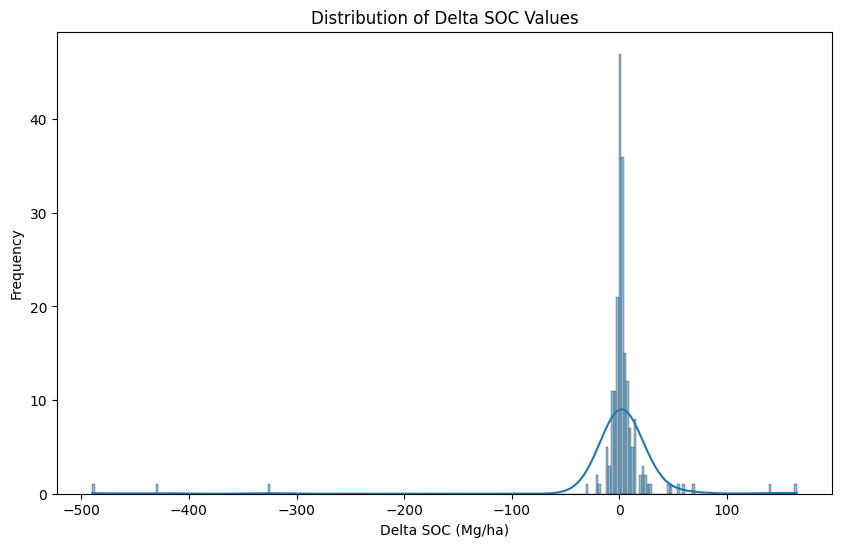

   IDstudy  plotID country    region     Mean_SOC_Mgha_Current  Mean_SOC_Mgha_Previous  Delta_SOC
0     1        1    Brazil     SaoPaulo          16.62                  16.480            0.140  
1     1        2    Brazil     SaoPaulo          15.47                  17.270           -1.800  
2     1        3    Brazil     SaoPaulo          15.28                  14.460            0.820  
3     1        4    Brazil     SaoPaulo           8.51                  15.145           -6.635  
4     2        5    Canada  Meadow_Lake            NaN                     NaN              NaN  


In [214]:
#Let's import the clean SOC data from a python script 

from clean_SOC import mean_soc_df

print(mean_soc_df.head())

In [154]:
#Make new columns with the log transformed values of SOC_Mg_ha_previous and SOC_Mg_ha_current
df['log_SOC_Mg_ha_previous'] = np.log1p(df['SOC_Mg_ha_previous'])
df['log_SOC_Mg_ha_current'] = np.log1p(df['SOC_Mg_ha_current'])

#Check that the new columns worked
df[['log_SOC_Mg_ha_previous', 'log_SOC_Mg_ha_current']].head()

,log_SOC_Mg_ha_previous,log_SOC_Mg_ha_current
0,1.363999,1.405438
1,1.336997,1.282502
2,1.615840,1.495873
3,1.529012,1.529770
4,1.347956,1.350199


In [155]:
#Make a choropleth of SOC_Mg_ha_current by country
#Group by country and calculate the mean of the log transformed SOC_Mg_ha_current
country_soc = df.groupby('country')['log_SOC_Mg_ha_current'].mean().reset_index()

fig = px.choropleth(country_soc, locations='country', locationmode='country names', color='log_SOC_Mg_ha_current', hover_name='country', color_continuous_scale='Viridis',
                    title='SOC_Mg_ha_current by country')
fig.show()



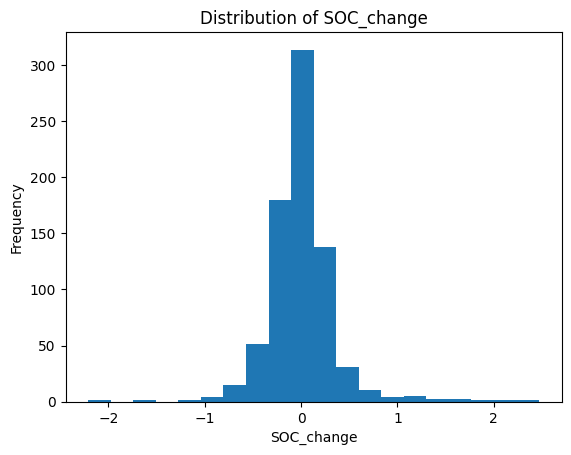

Skewness: 1.2333314647754674


In [156]:
#Calculate the change in SOC by subtracting SOC previous from SOC current
#Add a new column with this variable and test the distribution

df['SOC_change'] = df['SOC_Mg_ha_current'] - df['SOC_Mg_ha_previous']
check_distribution('SOC_change')

#Describe the SOC change variable
df['SOC_change'].describe()

#Define the SOC_change mean 
mean_change = df['SOC_change'].mean()



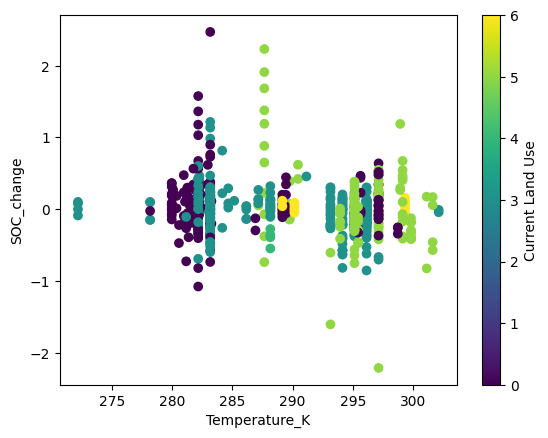

In [157]:
#Add a column next to temperature that shows the temperature in Kelvin

df['Temperature_K'] = df['temperature_Celsiul'] + 273.15
df[['temperature_Celsiul', 'Temperature_K']].head()

#Check the correlation between SOC_change and Temperature_K
df[['SOC_change', 'Temperature_K']].corr()

# Make a scatterplot of SOC_change and Temperature_K with current land use as color
plt.scatter(df['Temperature_K'], df['SOC_change'], c=df['current_land_use*'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Temperature_K')
plt.ylabel('SOC_change')
plt.colorbar(label='Current Land Use')
plt.show()


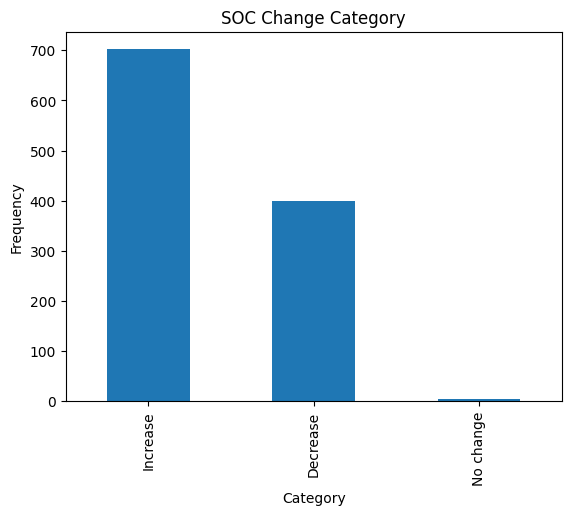

In [158]:
#Categorize the SOC_change variable into 3 categories: decrease, no change, increase
#Decrease: SOC_change < 0
#No change: SOC_change = 0
#Increase: SOC_change > 0

def categorize_SOC_change(SOC_change):
    if SOC_change < 0:
        return 'Decrease'
    elif SOC_change == 0:
        return 'No change'
    else:
        return 'Increase'
    
df['SOC_change_category'] = df['SOC_change'].apply(categorize_SOC_change)
df['SOC_change_category'].head()

#Make a bar plot of the SOC_change_category variable
df['SOC_change_category'].value_counts().plot(kind='bar')
plt.title('SOC Change Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


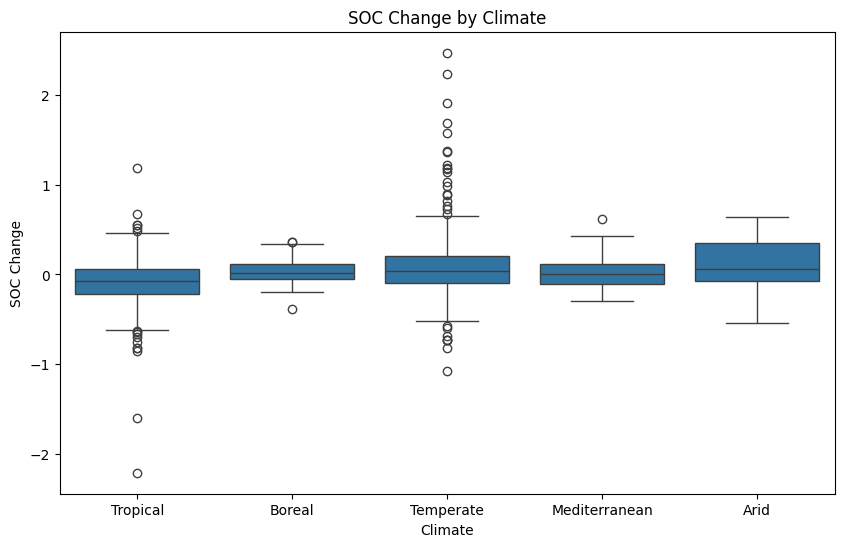

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         Arid        Boreal  -0.0575 0.9679 -0.3022  0.1871  False
         Arid Mediterranean  -0.0689 0.9607 -0.3459  0.2081  False
         Arid     Temperate  -0.0097 0.9999 -0.2144   0.195  False
         Arid      Tropical  -0.1915  0.077 -0.3952  0.0122  False
       Boreal Mediterranean  -0.0114 0.9999 -0.2524  0.2296  False
       Boreal     Temperate   0.0478 0.9123 -0.1047  0.2003  False
       Boreal      Tropical  -0.1339 0.1103 -0.2851  0.0172  False
Mediterranean     Temperate   0.0592 0.9282 -0.1411  0.2595  False
Mediterranean      Tropical  -0.1226 0.4458 -0.3218  0.0767  False
    Temperate      Tropical  -0.1818    0.0 -0.2517 -0.1118   True
------------------------------------------------------------------


In [159]:
#Do a boxplot of SOC_change by climate
plt.figure(figsize=(10, 6))
sns.boxplot(x='climate', y='SOC_change', data=df)
plt.title('SOC Change by Climate')
plt.xlabel('Climate')
plt.ylabel('SOC Change')
plt.show()

#print the values for climate 
df['climate'].value_counts()

#Remove any rows with missing SOC change values
df = df.dropna(subset=['SOC_change'])


tropical = df[df['climate'] == 'Tropical']
temperate = df[df['climate'] == 'Temperate']
boreal = df[df['climate'] == 'Boreal']
arid = df[df['climate'] == 'Arid']
mediterranean = df[df['climate'] == 'Mediterranean']

#Perform an ANOVA test to see if there is a significant difference in SOC_change between the different climate types
stats.f_oneway(tropical['SOC_change'], temperate['SOC_change'], boreal['SOC_change'], arid['SOC_change'], mediterranean['SOC_change'])

#Run post hoc tests to see which groups are different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['SOC_change'], groups=df['climate'], alpha=0.05)
print(tukey)

tap.plot_stats(df, 'climate', 'SOC_change', type_test= 'mann-whitney')




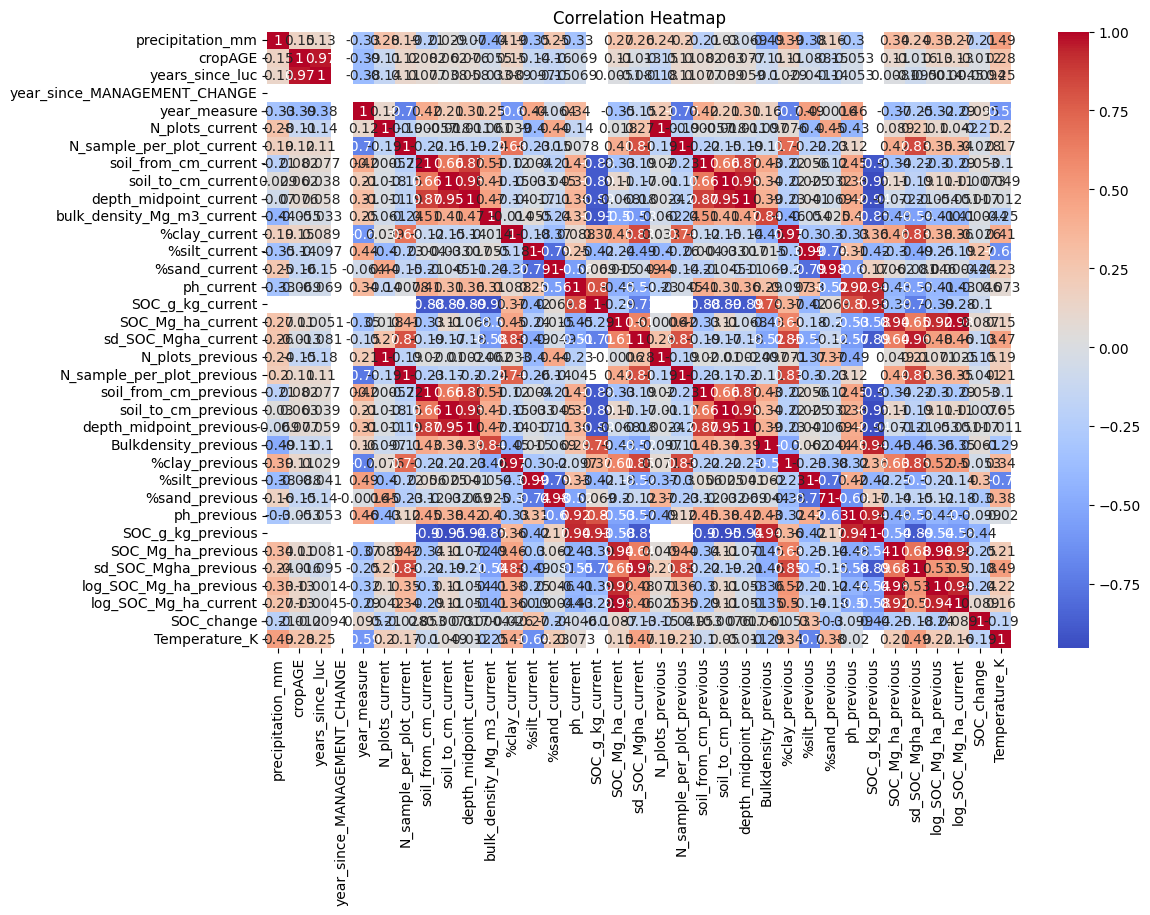

In [160]:
#Give me a list of all variables that are floats

floats = df.select_dtypes(include=['float64'])
floats.columns

#Exclude variables that do not make sense for a correlation matrix
floats = floats.drop(['Latitud', 'Longitud', 'yearPpub', 
                      'temperature_Celsiul'], axis=1)

#Do a heatmap of the correlation between all float variables
plt.figure(figsize=(12, 8))
sns.heatmap(floats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [161]:
#Let's see what variables are the best predictors of the SOC_change_category variable
#We will use a Decision Tree Classifier for this

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Drop the columns that are not needed
df = df.drop(['SOC_Mg_ha_previous', 'SOC_Mg_ha_current', 'log_SOC_Mg_ha_previous', 'log_SOC_Mg_ha_current', 'SOC_change'], axis=1)

#Drop rows with missing values
df = df.dropna()

#Encode the categorical variables
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['current_land_use*'] = le.fit_transform(df['current_land_use*'])
df['SOC_change_category'] = le.fit_transform(df['SOC_change_category'])

#Split the data into training and testing sets
X = df.drop('SOC_change_category', axis=1)
y = df['SOC_change_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Check the feature importances
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.title('Feature Importances')
plt.show()


ModuleNotFoundError: No module named 'sklearn'